In [1]:
#!/afs/inf.ed.ac.uk/user/s14/s1413557/miniconda2/bin/python
from __future__ import print_function #ffs
from f4klib2 import *

In [2]:
movs = loadMovids()
movs_length = loadLengths()
ids, pickables = loadPickables(movs) #Movid having reference in F4K csv

In [3]:
# 5  Broken contX, FEIF bugs, Ghost Fish?
# 30 No detection
# 40 Ghost Fish
# 131 100% no contour
# 247420 Giant M_____ F_____ size:201461
picker = 5
movid = movs[picker]
#info, clip, hasContour, contour, fish_id, frames = loadVideo(movid)
startframe = 6000
endframe = 6020
info, clip, hasContour, contour, fish_id, frames = loadVideo(movid,
                                                    print_info=True,
                                                    print_time=True)

Loading data took: 0:00:00.515268
Using video_id: 000091a58183e0358d5c3f8716c8491a#201101151720
Using movie, csv, sql paths: 
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/summary_000091a58183e0358d5c3f8716c8491a#201101151720.avi
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/summaries/0/00/frame_info_000091a58183e0358d5c3f8716c8491a#201101151720.txt
/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/sqldump/0/00/000091a58183e0358d5c3f8716c8491a#201101151720.txt
Video frame size: 320x240, camera_id: 37
Total frames in video: 4716
4716 out of 4716, about 100% detection have a bounding box in sql.
617 out of 4716 total detection is rejected by FEIF, 4099 kept. Reject rate: 13%
FEIF Runtime: 0:00:00.736309


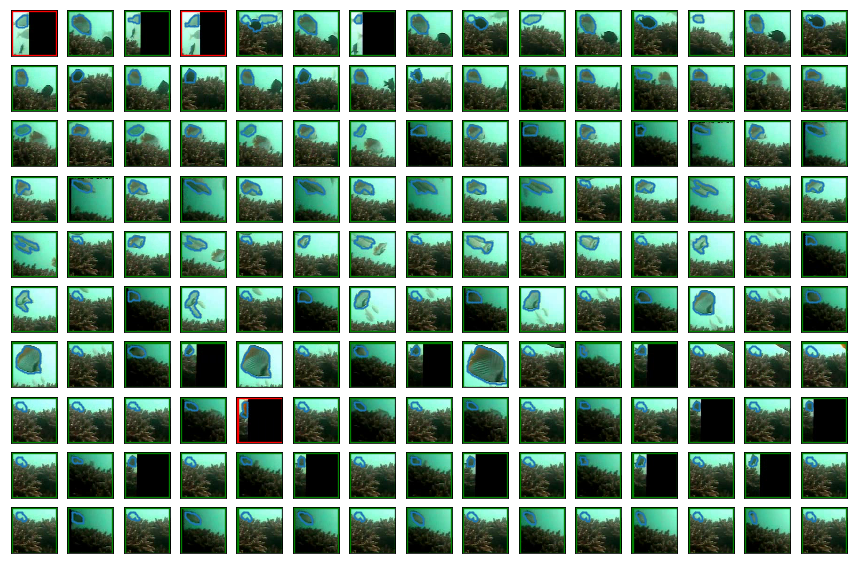

In [6]:
h = 200
w = 15
t = h + 10 * w 
plotStuff(info, clip, hasContour, contour, movid, limit_lower=h, limit_upper=t, width=w, classify=True)

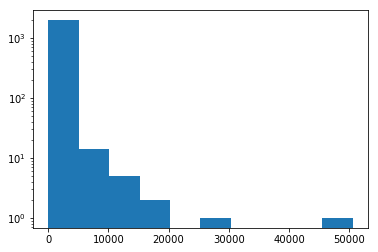

247420
['9fbd8da06c253c8546c4a3436ffa4e0e#201001010840' '38' '0']


In [23]:
plt.hist(np.histogram(movs_length, np.arange(0,200000,100))[0], log=True)
plt.show()
for i in range(len(movs_length)):
    if movs_length[i] > 200000:
        print(i)
        print(movs[i])

# Testing Algs Output
---

In [7]:
# STOP!
raise Exception('The code is too fabulous.')

Exception: The code is too fabulous.

In [41]:
matt_features = getMattFeatures(info, clip, hasContour, contour, fish_id, print_info=True, ret_normalized_erraticity=False)

Calculate 264 feature took total of 0:00:05.500201
147 out of 411 feature not calculated


In [8]:
print(matt_features.shape)

(4716L, 29L)


# Timetest

In [26]:
#Placeholder tookit
time = datetime.now()
print("Took total of {0}".format(datetime.now() - time))
time = datetime.now()

Took total of 0:00:00.000131


In [10]:
time = datetime.now()
for picker in range(frames):
    if hasContour[picker]:
        image1 = clip[picker]
        thiscontour = getContour(contour[picker])
        mask = np.full(image1.shape, 0, dtype=np.uint8)
        cv2.fillPoly(mask, np.array([thiscontour], dtype=np.int32), (255,)*3)
        image2 = cv2.cvtColor(image1,cv2.COLOR_RGB2YUV)
        image3 = normalizeRGB(image2)[:,:,0]
        image4 = cv2.bitwise_or(cv2.bitwise_not(mask),image1)
        image5 = cv2.cvtColor(image4,cv2.COLOR_RGB2YUV)
        image6 = normalizeRGB(image5)[:,:,0]
        image7 = cv2.bitwise_and(mask,image1)
        image8 = cv2.cvtColor(image7,cv2.COLOR_RGB2YUV)
        image9 = normalizeRGB(image8)[:,:,0]
    print("Image {1} took total of {0}".format(datetime.now() - time,picker+1),end='\r')
print("Took total of {0}              ".format(datetime.now() - time))

Took total of 0:00:03.539000              


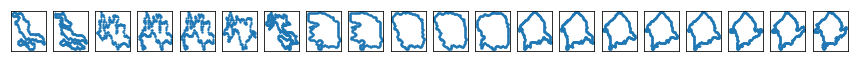

In [11]:
path = '/afs/inf.ed.ac.uk/group/ug4-projects/s1413557/line107340.txt'
if os.name == "nt":
    path = 'E:/line107340.txt'
plotContourFromOriginalFile(path,limit_amount=20, add_milk=False)

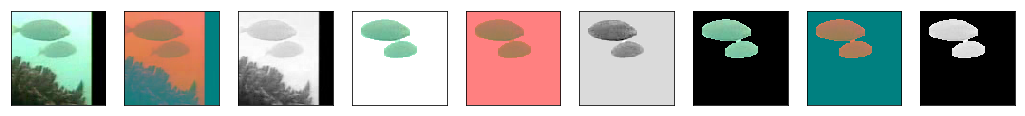

In [5]:
picker = 177
showTransformedImage(picker, clip, hasContour, contour)

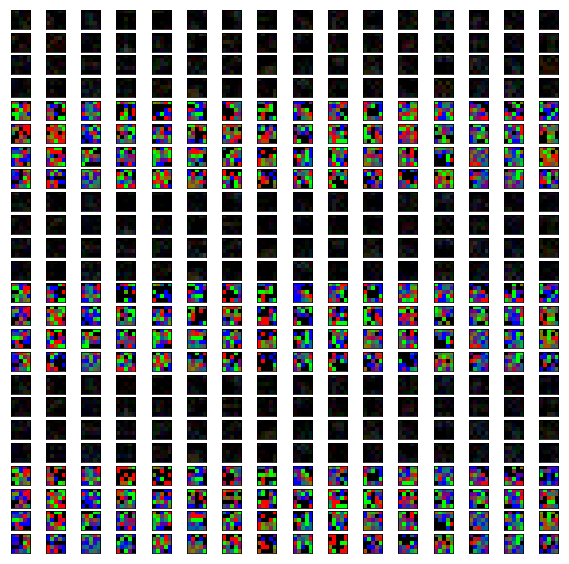

In [11]:
printCNNweight()

In [12]:
printCameras()

37,1,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
38,3,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
39,4,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
40,1,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
41,2,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
42,2,'NPP-3','3.6mm F1.8 1/3 inches CCD',0,5
43,3,'HoBiHu','3.6mm F1.8 1/3 inches CCD',0,5
44,1,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15
46,2,'LanYu','3.6mm Iris:auto 1/3 inches CCD; white LED night sight',0,15


In [ ]:
movs = loadMovids()
time = datetime.now()
for i in range(1584):
    __, clip2, __, __, __, __ = loadVideo(movs[i],print_info=False,print_time=True)
    print("Checked Video: {0}  ID: {1}, took: {2}".format(i, movs[i][0],datetime.now()-time), end='\r')

In [39]:
get = False
id1 = 0;
id2 = 0;
for i, item in enumerate(movs):
    if (not get) and (item[0][:3] == "13b"):
        print(i)
        id1 = i
        get = True
    if get and (item[0][:3] == "13c"):
        print(i)
        id2 = i
        break
print(movs[id1-1])
print(movs[id1])
print(movs[id2-1])
print(movs[id2])

30598
30695
['13af5ee11f80194b90df624b724cbfd7#201104041540' '41' '1']
['13b002807976fe6baf25398a889cf358#201206121450' '39' '1']
['13bf835042ad37aee7333c1cacbba3e9#201012191350' '41' '0']
['13c00c732c91d781afc8f24c2e63b372#201002091340' '42' '0']


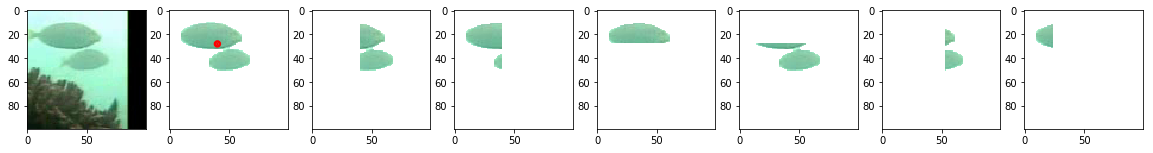

In [6]:
picker = 5
picker2 = 177
printSeperateFish(picker,picker2)

In [4]:
# Took a total of 0:18:53.200900           
# FEIF return 1429549 true
# FEIF return 1097033 false
# total of 743102 detection have no contour
# Will took about 80 hours to finish all.
reject = 359699
kept = 2166942
no_contour = 743122
summu = reject+kept+no_contour
print("Maybe we only need to calculate {0:.3f}% of the features.".format(100.0*kept/summu))
print("Rejected {0:.3f}% of the features.".format(100.0*reject/summu))
print("{0:.3f}% of the features have no Contour.".format(100.0*no_contour/summu))

Maybe we only need to calculate 66.272% of the features.
Rejected 11.001% of the features.
22.727% of the features have no Contour.


In [49]:
def secToTime(seconds, mode = "full"):
    days = int(seconds // 86400)
    seconds = seconds % 86400
    hours = int(seconds // 3600)
    seconds = seconds % 3600
    minutes = int(seconds // 60)
    seconds = int(seconds % 60)
    if mode == "hour":
        return " {0} Hours".format(24*days+hours)
    return " {0} Days {1} Hours {2} Minute {3} Seconds".format(days,hours,minutes,seconds)

In [50]:
total_features = 839000000
feif_reduction_rate = 0.66272
videos = 396901

qiqi_time_find_track = 19.2
qiqi_time_extraction = 110.1 
qiqi_time_image_preprocess = 70.0
qiqi_total = qiqi_time_find_track + qiqi_time_extraction + qiqi_time_image_preprocess
qiqi_core_used = 32 #32 out of 40
qiqi_core_used_minimal = 8 #If core is poorly utilized
qiqi_feature_used = 961
qiqi_videos = 455993

my_time_find_track = 0.509453
my_time_extraction = 37 * 60 + 22.1
my_time_image_preprocess = 6.751748
my_total = my_time_find_track + my_time_extraction + my_time_image_preprocess
my_core_used = 1
my_core_used_maximal = 2
my_feature_used = 4716
my_feature_used_actual = 4103

used_total = qiqi_total
used_total2 = my_total

print("Qiqi's calculated runtime using original code (32 core):")
print(secToTime(used_total*qiqi_videos, mode="hour"))
print(secToTime(used_total*qiqi_videos))

print("\nQiqi's calculated runtime using original code (32 core) (corrected total):")
print(secToTime(used_total/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total/qiqi_feature_used*total_features))

print("\nSingle-core Runtime using original code:")
print(secToTime(used_total*qiqi_core_used/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total*qiqi_core_used/qiqi_feature_used*total_features))

print("\n300-core Runtime using original code:")
print(secToTime(used_total*qiqi_core_used/300/qiqi_feature_used*total_features, mode="hour"))
print(secToTime(used_total*qiqi_core_used/300/qiqi_feature_used*total_features))

print("\nMy calculated runtime (1 process, uses about 4*40% = 1.6 core):")
print(secToTime(used_total2/my_feature_used*total_features, mode="hour"))
print(secToTime(used_total2/my_feature_used*total_features))

print("\nMy calculated runtime (reduced with FEIF):")
print(secToTime(used_total2/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/my_feature_used_actual*total_features*feif_reduction_rate))

print("\n300-core runtime using my code:")
print(secToTime(used_total2/300*my_core_used/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/300*my_core_used/my_feature_used_actual*total_features*feif_reduction_rate))

print("\n300-core runtime using my code (worst-case: 2 process per machine):")
print(secToTime(used_total2/300*my_core_used_maximal/my_feature_used_actual*total_features*feif_reduction_rate, mode="hour"))
print(secToTime(used_total2/300*my_core_used_maximal/my_feature_used_actual*total_features*feif_reduction_rate))

print("\nMy process's average runtime per feature:")
print(my_total/my_feature_used_actual)

Qiqi's calculated runtime using original code (32 core):
 25244 Hours
 1051 Days 20 Hours 16 Minute 44 Seconds

Qiqi's calculated runtime using original code (32 core) (corrected total):
 48332 Hours
 2013 Days 20 Hours 57 Minute 27 Seconds

Single-core Runtime using original code:
 1546654 Hours
 64443 Days 22 Hours 38 Minute 31 Seconds

300-core Runtime using original code:
 5155 Hours
 214 Days 19 Hours 30 Minute 55 Seconds

My calculated runtime (1 process, uses about 4*40% = 1.6 core):
 111159 Hours
 4631 Days 15 Hours 3 Minute 34 Seconds

My calculated runtime (reduced with FEIF):
 84673 Hours
 3528 Days 1 Hours 26 Minute 35 Seconds

300-core runtime using my code:
 282 Hours
 11 Days 18 Hours 14 Minute 41 Seconds

300-core runtime using my code (worst-case: 2 process per machine):
 564 Hours
 23 Days 12 Hours 29 Minute 22 Seconds

My process's average runtime per feature:
0.548223543992


# Windows Test Code below, cuz no library loves windows.

In [5]:
f4k_features = np.load("C:\Users\YuJianmeng\Desktop\\000091a58183e0358d5c3f8716c8491a#201101151720.f4kfeature.npy")
matt_features = np.load("C:\Users\YuJianmeng\Desktop\\000091a58183e0358d5c3f8716c8491a#201101151720.mattfeature.npy")
feif_mask = np.load("C:\Users\YuJianmeng\Desktop\\000091a58183e0358d5c3f8716c8491a#201101151720.feif.npy")
features = np.column_stack((f4k_features,matt_features))

In [6]:
pdFeatures = pd.DataFrame(features)
pdFeatures.describe()

,0,1,2,3,4,5,6,7,8,9,...,2645,2646,2647,2648,2649,2650,2651,2652,2653,2654
count,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,...,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000,4716.000000
mean,0.047761,0.004730,0.005602,0.006380,0.008325,0.011507,0.017112,0.026748,0.043515,0.067123,...,1377.132952,476.085666,1424.459924,455.829729,1351.825488,544.440204,1530.262723,739.238974,772.665818,840.651612
std,0.158739,0.015063,0.016333,0.017598,0.021635,0.026509,0.036185,0.050325,0.071256,0.090752,...,772.806095,239.856302,819.512998,274.686283,771.661224,346.217531,843.367173,457.455999,421.512308,533.210618
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,968.000000,367.750000,980.000000,312.000000,931.750000,351.000000,1095.000000,479.000000,571.000000,516.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005845,0.021610,...,1402.000000,502.000000,1433.000000,437.000000,1368.000000,512.500000,1571.500000,703.000000,785.000000,801.000000
75%,0.002268,0.000000,0.000000,0.002320,0.005452,0.010506,0.017805,0.031843,0.061407,0.112274,...,1817.000000,634.000000,1892.000000,599.000000,1797.000000,716.000000,2025.250000,976.250000,1022.000000,1127.250000
max,0.916129,0.178082,0.171642,0.214286,0.295455,0.373913,0.437500,0.517241,0.516129,0.558824,...,5619.000000,1132.000000,6129.000000,1642.000000,5614.000000,2024.000000,5872.000000,2554.000000,2977.000000,2856.000000


In [ ]:
if os.name == "nt":    
    import matlab.engine
    eng = matlab.engine.start_matlab()
    eng.addpath(r'C:/Users/YuJianmeng/f4k/matt-msc/workspace/f4k/fish_recog',nargout=0)

In [ ]:
if os.name == "nt":
    
    i = 0
    thiscontour = getContour(contour[i])
    mask = np.full(image.shape, 0, dtype=np.uint8)
    cv2.fillPoly(mask, np.array([thiscontour], dtype=np.int32), (255,)*3)
    image = clip[i]

    eng.workspace['A'] = image.tolist()
    print(len(image.tolist()))

    (c,d) = eng.generateFeatureFromPython(image.reshape(1,-1).tolist(),full_fish.reshape(1,-1).tolist(),nargout=2)

    print(np.array(c,dtype="double").shape)

In [ ]:
if os.name == "nt":
    eng.exit()
    eng.quit()
    del eng

# Below code only work on DICE. (#JustPyMatlabThings)

In [36]:
if os.name != "nt":
    import pymatlab
    session = pymatlab.session_factory('matlab -nojvm -nodisplay')
    #session.run('cd /afs/inf.ed.ac.uk/user/s14/s1413557/f4k-2017-msc-master/matt-msc/workspace/f4k/fish_recog')
    session.run("addpath('/afs/inf.ed.ac.uk/user/s14/s1413557/f4k-2017-msc-master/matt-msc/workspace/f4k/fish_recog')")

In [ ]:
if os.name != "nt":
    time = datetime.now()
    for i in range(5):
        thisContour = np.int32([getContour(contour[i])])
        image = clip[i]
        full_fish = np.full((100,100), 0, dtype=np.uint8)
        cv2.fillPoly(full_fish, thisContour, (255,))
        session.putvalue('A',image)
        session.putvalue('B',full_fish)
        session.run('[C, D] = feature_generateFeatureVector(A,B,false)')
        c = session.getvalue('C')
        d = session.getvalue('D')
        print("Process {0} image took {1}".format(i,datetime.now() - time), end='\r')
    print("Took a total of {0}           ".format(datetime.now() - time) )

In [35]:
if os.name != "nt":
    del session

---